
![](Logo3.png)

# Correlación 


## Tabla de Contenido

[1. Que es la Correlacion](#id1)<br>
[2. Contexto de la práctica](#id2)<br>
[3. Evaluar dataset](#id3)<br>
[4. Separar los datos](#id4)<br>
[5. Gráficos de dispersión y variables correlacionables](#id5)<br>
[6. Calcular la correlación con Python](#id6)<br>
[7. Mapas de calor con Python (Heatmap)](#id7)<br>  

## Que es la Correlación  <a id='id1'> </a>

- La correlación es una relación estadística importante que puede indicar si los valores variables tienen relación lineal.
- La correlación es una relación entre fenómenos en la que dos o más cosas cambian a una velocidad similar. 

## 2. Contexto de la práctica    <a id='id2'> </a>

El objetivo de este laboratorio es:
- Aprender a utilizar Python para calcular la correlación.
- Aprender a identificar si las variables de un determinado conjunto de datos son correlacionables.
- utilizar Python para calcular la correlación entre dos conjuntos de variables.  

**Acerca del dataset**  
- Se utilizará un conjunto de datos que contiene un ejemplo de **40 estudiantes diestros de introducción a la psicología anglosajona** de la universidad de Southwestern. 
- Los sujetos realizaron cuatro pruebas secundarias (vocabulario, similitudes, diseño de bloque y finalización de imagen) de la Escala Wechsler de Inteligencia para Adultos (1981). 
- Los investigadores utilizaron imágenes por resonancia magnética (IRM) para determinar el tamaño del cerebro de los sujetos. 
- Se incluyó información sobre el género y el tamaño del cuerpo (altura y peso). 

Los investigadores toman en cuenta el género y el tamaño corporal para sacar **conclusiones sobre la conexión entre el tamaño del cerebro y la inteligencia**.  

Los investigadores retuvieron el peso de dos sujetos y la altura de un sujeto por razones de confidencialidad.

**Nombres de variables**:
1. **Gender**: Genero: Hombre o Mujer
2. **FSIQ**: puntajes de IQ a escala completa basados en las cuatro subpruebas de Wechsler (1981)
3. **VIQ**: puntuaciones de coeficiente intelectual verbal basadas en las cuatro subpruebas de
Wechsler (1981)
4. **PIQ**: puntuaciones de IQ de rendimiento basadas en las cuatro subpruebas de Wechsler (1981)
5. **Weight**: peso corporal en libras
6. **Height**: altura en pulgadas
7. **MRI_Count**: recuento total de píxeles de 18 exploraciones de MRI

## 3. Evaluar dataset  <a id='id3'> </a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Familiarizarse con lainformacion del datset 

brainFile = 'brainsize.txt'
brainFrame = pd.read_csv(brainFile)
brainFrame.head(25)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


In [5]:
brainFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     40 non-null     object 
 1   FSIQ       40 non-null     int64  
 2   VIQ        40 non-null     int64  
 3   PIQ        40 non-null     int64  
 4   Weight     38 non-null     float64
 5   Height     39 non-null     float64
 6   MRI_Count  40 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 2.3+ KB


In [6]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


## 4. Separar los datos  <a id='id4'> </a>

- Para asegurarse de que **los resultados no se sesguen** debido a las diferencias entre organismos femeninos y masculinos, la estructura de datos **se divide en dos: una que contiene todas las entradas masculinas y otra solo con instancias femeninas**.
- Al ejecutar la siguiente celda, se crean las dos nuevas estructuras de datos, menDf y womenDf; cada una incluye las entradas respectivas.

In [7]:

menDf = brainFrame[(brainFrame.Gender == 'Male')]
menDf

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466
11,Male,141,150,128,151.0,70.0,1079549
12,Male,135,129,124,155.0,69.0,924059
17,Male,100,96,102,178.0,73.5,945088
19,Male,80,77,86,180.0,70.0,889083
20,Male,83,83,86,NaN,NaN,892420


In [8]:
#

womenDf = brainFrame[(brainFrame.Gender == 'Female')]
womenDf

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
10,Female,132,129,124,118.0,64.5,833868
13,Female,140,120,147,155.0,70.5,856472
14,Female,96,100,90,146.0,66.0,878897
15,Female,83,71,96,135.0,68.0,865363
16,Female,132,132,120,127.0,68.5,852244


## 5. Gráficos de dispersión y variables correlacionables  <a id='id5'> </a>

- Los **gráficos de dispersión son importantes para identificar correlaciones, ya que permiten una verificación visual rápida de la naturaleza de la relación entre las variables**. 
- Esta práctica de laboratorio utiliza el **coeficiente de correlación de Pearson**, que es sensible sólo a una **relación lineal entre dos variables**. 
- Existen otros métodos de correlación más robustos.

### Crear valor medio de las diferentes medidas de inteligencia (PIQ, FSIQ y VIQ)

- Como el conjunto de datos incluye tres medidas diferentes de inteligencia (PIQ, FSIQ y VIQ), se calcula el **valor promedio entre las tres** y se guarda el resultado en la variable **menMeanSmarts**. 

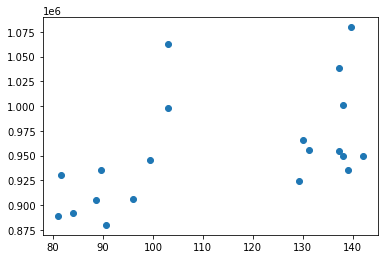

In [9]:
# 

menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()

#### Se realiza el mismo proceso para el dataframedel sexo femenino

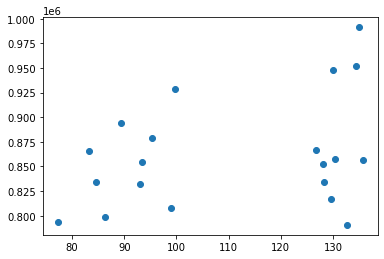

In [10]:
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])
plt.show()

## 6. Calcular la correlación con Python <a id='id6'> </a>

- El **método pandas corr()** ofrece una manera fácil de calcular la correlación según una estructura de datos. 
- Simplemente se aplica el método en la estructura de datos.
- Se puede obtener la correlación entre todas las variables al mismo tiempo.

In [11]:
brainFrame.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


**Observaciones**  

- La diagonal de izquierda a derecha en la tabla de correlación generada arriba la diagonal está en 1.
-  Los valores se duplican; los valores debajo de la diagonal 1 tienen valores homólogos duplicados sobre la diagonal 1

In [12]:
# Correlacion de las variables que contiene la estructura de datos femenina

womenDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


In [13]:
# Correlacion de las variables que contiene la estructura de datos masculina

menDf.corr(method='pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


##  Mapas de calor  (Heatmap) <a id='id7'> </a>

-  En un mapa de calor, los campos de datos forman etiquetas horizontales y verticales para una red de valores. 
- **Cada valor de celda es el coeficiente de correlación para un campo** en la dimensión horizontal de la red con un campo en el eje vertical. 
- El valor de la intersección de las dimensiones seleccionadas es el coeficiente para ese par de valores. 
- Los valores de correlación están **codificados por colores. La intensidad o el matiz de color para cada valor es proporcional a ese valor**.
- **Cuanto más profundo es el color, más cercano está el valor a 1 o -1**. Esto ayuda a aportar un significado a partir de los datos de correlación.

**Requisitos para usar mapas de calor**
- **Cualquier número no entero o valor no flotante podría generar errores** al intentar trazar mapas de calor con seaborn. 
- Para evitar estos errores, **las entradas que no son números deben eliminarse** de los dataframes. 
- Por lo tanto, el género que contiene valores que no son números (“masculino” o “femenino"), esa columna debe retirarse.

In [14]:
# importamos la libreria para generar mapas de calor

import seaborn as sns

In [15]:
# Borramos las columnas del sexo 

womenNoGenderDf = womenDf.drop('Gender', axis=1)
menNoGenderDf = menDf.drop('Gender', axis=1)

In [16]:
# NOs aseguramos que las columnas de los dataframes son de tipo float

womenNoGenderDf = womenNoGenderDf[womenNoGenderDf.columns].astype(float)
menNoGenderDf = menNoGenderDf[menNoGenderDf.columns].astype(float)

In [21]:
# Generamos un nuevo dataframe wcoor con la matriz de correlacion de las variables del sexo femenino

wcoor = womenNoGenderDf.corr()
wcoor

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


<AxesSubplot:>

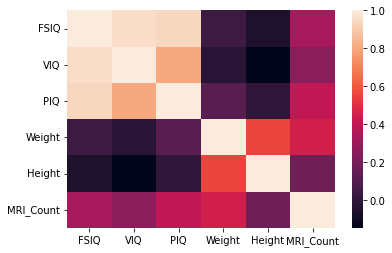

In [22]:
# generamos el mapa de calor del dataframe wcorr (mujeres)

sns.heatmap(wcorr)

#plt.savefig('correlations_women.png', tight_layout=True)

<AxesSubplot:>

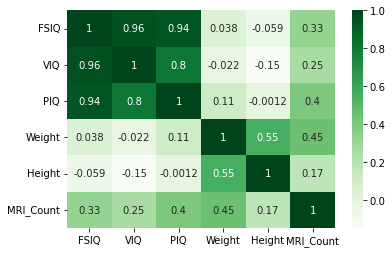

In [23]:
# Modificamos la apariencia del heatmpap mostrando los valores en el grafico
# y modificamos la paleta de colores

sns.heatmap(wcoor, annot=True, cmap = "Greens" )

#### Lo mismo hacemos para el sexo masculino

In [24]:
# # Generamos un nuevo dataframe wcoor con la matriz de correlacion de las variables del sexo masculino

mcoor = menNoGenderDf.corr()
mcoor

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


<AxesSubplot:>

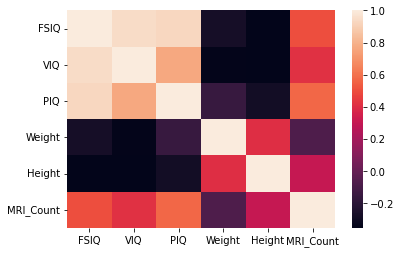

In [25]:
# generamos el mapa de calor del dataframe mcorr  (hombres)

sns.heatmap(mcorr)

#plt.savefig('attribute_correlations.png', tight_layout=True)

<AxesSubplot:>

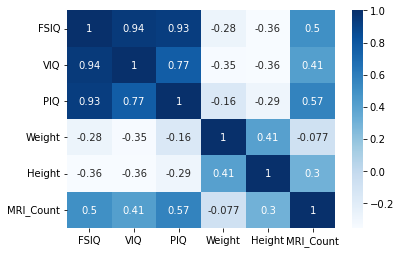

In [26]:
# Modificamos la apariencia del heatmpap mostrando los valores en el grafico
# y modificamos la paleta de colores

sns.heatmap(mcoor, annot=True, cmap = "Blues" )

### ¿Qué variables tienen una correlación más estrecha con el tamaño del cerebro (MRI_Count)? ¿Es eso lo que se espera? Explique.